# COGS 108 - EDA Checkpoint

# Names
- Zhenyi Chen
- Alison Camille Dunning
- Matthieu Dante Pardin
- Amogh Patankar

<a id='research_question'></a>
# Research Question

Which neighborhoods in the City of Detroit had the most crime in 2011-2014? Can we attribute relative crime rates to factors such as the presence of storm prevention infrastructure, government protection, or policing? Do any of these factors contribute to a certain *kind* of crime?

# Dataset(s)

*We are given several datasets from the City of Detroit. Our "main" dataset consists of crime information from 2011-2014. We use supplementary datasets containing information about police scouting, green stormwater infrastructure locations, and Master Plan neighboods. We will be examining the relationship between these supplemental city plans/policies and crime. We will do this by comparing different neighborhoods, as the neighborhoods vary by crime rates, type of crime, as well as the factors addressed in the supplementary datasets. Thus, we will be combining the datasets based on the different **neighborhoods**, and for policing analysis, **precincts**.*

### **Dataset 1: Reported Major Crimes from 2011 to 2014**

- Link: https://data.detroitmi.gov/datasets/reported-major-crimes-2011-to-2014
- Number of observations: 234948
- Description: This dataset contains reported major crimes from 2011 to 2014 with categories such as stolen vehicle, aggravated assault, larceny, burglary, robbery, and homicide. And each observation has the record of crime_category, date, neighborhood, precinct, latitude, and longitude.

### Dataset 2: DPD Scout Car Areas

- Link: https://data.detroitmi.gov/datasets/dpd-scout-car-areas
- Number of observations: 131
- Description: This dataset contains the Detroit Police Department scout car records with covered area(precinct).

### Dataset 3: Green Stormwater Infrastructure Locations

- Link: https://data.ferndalemi.gov/datasets/a3c583dcd57e40e2a9719b19e80226df_0
- Number of observations: 233
- Description: This dataset contains the green stromwater infrastructure locatoins with asset_category, latitude and longtitude of the installation, neighborhood's name and district number.

### Dataset 4: Master Plan Neighborhoods

- Link: https://data.detroitmi.gov/datasets/master-plan-neighborhoods?geometry=-83.979%2C42.264%2C-82.222%2C42.442
- Number of observations: 54
- Description: This dataset ontains the master plan neightborhoods with neighborhoods' names, cluster, map numbers, map pages and the length and area of the neighborhoods.

# Setup

In [2]:
## YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})
sns.set_style('darkgrid')

# Data Cleaning
## Cleaning Individual Datasets
Before merging all the datasets, we will conduct cleaning procedures for each individual dataset.

### Crime Dataset

In [3]:
crime = pd.read_csv('data/Reported_Major_Crimes_2011_to_2014.csv')
crime.head()

,ROWNUM,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,NEIGHBORHOOD,CENSUSTRACT,LOCATION,ObjectId
0,1311873,STOLEN VEHICLE,VEHICLE THEFT,24001,2011/01/02 00:00:00+00,0,1103.0,11.0,PERSHING,5066.0,"00 EUREKA/E LANTZ\n(42.4382, -83.0579)",1
1,1311874,AGGRAVATED ASSAULT,AGG/FEL ASSAULT - NON-FAMILY - OTHER WEAPON,13002,2011/01/02 00:00:00+00,11,709.0,7.0,LAFAYETTE PARK,5166.0,"E.LAFAYETTE01800\n(42.3394, -83.0295)",2
2,1311878,LARCENY,"LARCENY - FROM BUILDING (INCLUDES LIBRARY, OFF...",23003,2011/01/02 00:00:00+00,11,1105.0,11.0,OUTER DRIVE VAN DYKE,5051.0,"VANDYKE19900\n(42.4415, -83.0238)",3
3,1311879,LARCENY,LARCENY (OTHER),23007,2011/01/01 00:00:00+00,20,706.0,7.0,CHENE,5188.0,"JOS CAMPAU04100\n(42.3606, -83.0339)",4
4,1311883,STOLEN VEHICLE,VEHICLE THEFT,24001,2011/01/02 00:00:00+00,3,612.0,6.0,WARRENDALE,5457.0,"PIEDMONT06000\n(42.3328, -83.228)",5


In [4]:
crime['INCIDENTDATE'].unique()

array(['2011/01/02 00:00:00+00', '2011/01/01 00:00:00+00',
       '2011/01/03 00:00:00+00', ..., '2014/12/25 00:00:00+00',
       '2014/12/30 00:00:00+00', '2014/12/29 00:00:00+00'], dtype=object)

In [5]:
crime['INCIDENTDATE'] = crime['INCIDENTDATE'].astype(str).str[:7]
crime.head()

,ROWNUM,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,NEIGHBORHOOD,CENSUSTRACT,LOCATION,ObjectId
0,1311873,STOLEN VEHICLE,VEHICLE THEFT,24001,2011/01,0,1103.0,11.0,PERSHING,5066.0,"00 EUREKA/E LANTZ\n(42.4382, -83.0579)",1
1,1311874,AGGRAVATED ASSAULT,AGG/FEL ASSAULT - NON-FAMILY - OTHER WEAPON,13002,2011/01,11,709.0,7.0,LAFAYETTE PARK,5166.0,"E.LAFAYETTE01800\n(42.3394, -83.0295)",2
2,1311878,LARCENY,"LARCENY - FROM BUILDING (INCLUDES LIBRARY, OFF...",23003,2011/01,11,1105.0,11.0,OUTER DRIVE VAN DYKE,5051.0,"VANDYKE19900\n(42.4415, -83.0238)",3
3,1311879,LARCENY,LARCENY (OTHER),23007,2011/01,20,706.0,7.0,CHENE,5188.0,"JOS CAMPAU04100\n(42.3606, -83.0339)",4
4,1311883,STOLEN VEHICLE,VEHICLE THEFT,24001,2011/01,3,612.0,6.0,WARRENDALE,5457.0,"PIEDMONT06000\n(42.3328, -83.228)",5


In [6]:
crime.shape

(234978, 12)

In [7]:
crime.dtypes

ROWNUM                     int64
CATEGORY                  object
OFFENSEDESCRIPTION        object
STATEOFFENSEFILECLASS      int64
INCIDENTDATE              object
HOUR                       int64
SCA                      float64
PRECINCT                 float64
NEIGHBORHOOD              object
CENSUSTRACT              float64
LOCATION                  object
ObjectId                   int64
dtype: object

#### Selecting Columns
We'll begin cleaning this dataset by extracting columns that we will for sure need in our analysis and to merge this dataset with the others. The only columns we will need are crime category, as we may want to analyze the policy-driven factors behind each type of crime. We will also need `Neighborhood` as this will be our primary merging key, as well as `Location`. We'll also convert the column names to snake case for consistency. 

Here are the columns we'll be keeping:
- `CATEGORY`
- `DATE`
- `NEIGHBORHOOD`
- `LOCATION`
- `PRECINCT`

Our dataset will be much simpler.

In [8]:
crime = crime[['CATEGORY','INCIDENTDATE', 'NEIGHBORHOOD', 'LOCATION', 'PRECINCT']].rename(
    columns={
        'CATEGORY': 'crime_category', 
        'INCIDENTDATE': 'date',
        'NEIGHBORHOOD': 'neighborhood', 
        'LOCATION': 'location',
        'PRECINCT': 'precinct'
    })
crime.head()

,crime_category,date,neighborhood,location,precinct
0,STOLEN VEHICLE,2011/01,PERSHING,"00 EUREKA/E LANTZ\n(42.4382, -83.0579)",11.0
1,AGGRAVATED ASSAULT,2011/01,LAFAYETTE PARK,"E.LAFAYETTE01800\n(42.3394, -83.0295)",7.0
2,LARCENY,2011/01,OUTER DRIVE VAN DYKE,"VANDYKE19900\n(42.4415, -83.0238)",11.0
3,LARCENY,2011/01,CHENE,"JOS CAMPAU04100\n(42.3606, -83.0339)",7.0
4,STOLEN VEHICLE,2011/01,WARRENDALE,"PIEDMONT06000\n(42.3328, -83.228)",6.0


#### Cleaning `neighborhood`
This is the main variable we will be examining in this project.

In [9]:
# Convert the case of neighborhood for easier merging
crime['neighborhood'] = crime['neighborhood'].str.title()

#### Cleaning `Location`
The first two columns we have are both pretty clean. However, `Location` is formatted strangely. Furthermore, we won't need alphabetical characters in the column, as we are only interested in the latitude and longitude values. We will clean this column by removing the text before the latitude and longitude coordinates as well as putting the two coordinates in separate columns. For removing the unnecessary bits of text, we will utilize regular expressions (courtesy of the `re` library).

In [10]:
# Removing everything before parentheses indicating latitude-longitude tuple
crime['location'] = crime['location'].apply(lambda x: re.sub('^[^\(]+', '', x)).str.strip()

# Get list of only numbers in the location column
crime['location'] = crime['location'].apply(lambda x: re.findall(r'\d+\.\d+', x))

# Separate into latitude and longitude columns
crime = pd.concat([
    crime, pd.DataFrame(
        crime['location'].to_list(), 
        columns=['latitude', 'longitude']
    )], 1).drop('location', 1)

# Change to float columns
crime[['latitude', 'longitude']] = crime[['latitude', 'longitude']].astype(float)

crime.head()

,crime_category,date,neighborhood,precinct,latitude,longitude
0,STOLEN VEHICLE,2011/01,Pershing,11.0,42.4382,83.0579
1,AGGRAVATED ASSAULT,2011/01,Lafayette Park,7.0,42.3394,83.0295
2,LARCENY,2011/01,Outer Drive Van Dyke,11.0,42.4415,83.0238
3,LARCENY,2011/01,Chene,7.0,42.3606,83.0339
4,STOLEN VEHICLE,2011/01,Warrendale,6.0,42.3328,83.2280


The `crime` dataset is now in tidy format! Lastly, let's check for missing values.
#### Missing Values

In [11]:
crime.isnull().sum()

crime_category       0
date                 0
neighborhood      1576
precinct          1129
latitude             0
longitude            0
dtype: int64

Our missing values are in the `neighborhood` column. While we could drop these observations, we also have the latitude and longitude information, so we can impute using those coordinates. Let's check if each neighborhood has non-overlapping coordinates. We do this because if the coordinates don't overlap, we can map a set of coordinates to a neighborhood with 100% confidence.

In [12]:
crime.groupby('neighborhood')[['latitude', 'longitude']].agg(['min', 'max'])

latitude          longitude         
                            min      max       min      max
neighborhood                                               
Arden Park/East Boston  42.3809  42.3916   83.0726  83.0854
Atkinson-Euclid         42.3677  42.3837   83.0777  83.0906
Bagley                  42.4168  42.4317   83.1407  83.1611
Balduck Park            42.3989  42.4254   82.9103  82.9329
Barton Mcfarlane        42.3513  42.3736   83.1481  83.1781
...                         ...      ...       ...      ...
West Village            42.3489  42.3588   82.9930  83.0011
Westwood Park           42.3860  42.3955   83.2309  83.2373
Winter Halter           42.3686  42.3955   83.1310  83.1518
Woodlawn Cemetery       42.4449  42.4465   83.1245  83.1314
Woodmere                42.2921  42.3674   83.0846  83.1421

[158 rows x 4 columns]

Unfortunately, the latitudes and longitudes definitely overlap, so we won't be able to impute the missing neighborhoods given the information in this dataset. We will just drop the missing observations.

In [13]:
n_rows = len(crime)

crime.dropna(inplace=True)
crime.isnull().sum()

crime_category    0
date              0
neighborhood      0
precinct          0
latitude          0
longitude         0
dtype: int64

In [14]:
print(f'Percent of dataset removed: {round((n_rows - len(crime)) / n_rows, 4) * 100}%')

Percent of dataset removed: 0.84%


We don't have to worry much anyway about dropping the missing values since we only removed a *very* small amount of our dataset. Upon inspection, we also noticed missing values for `precinct`, indicated as 99. To avoid confusion, we'll change those to `NaN`, since they don't occur very much in our dataset.

Text(0, 0.5, 'Frequency')

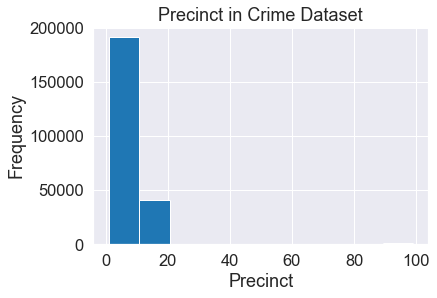

In [15]:
crime['precinct'].hist()
plt.title('Precinct in Crime Dataset')
plt.xlabel('Precinct')
plt.ylabel('Frequency')

In [16]:
crime['precinct'].replace({99: np.nan}, inplace=True)

Now, we don't have outliers in the `precinct` column.

Text(0, 0.5, 'Frequency')

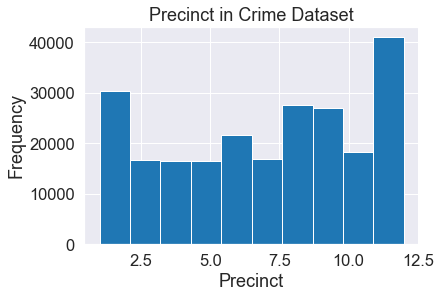

In [17]:
crime['precinct'].hist()
plt.title('Precinct in Crime Dataset')
plt.xlabel('Precinct')
plt.ylabel('Frequency')

### DPD Scout Areas

In [18]:
scout = pd.read_csv('data/DPD_Scout_Car_Areas.csv')
scout.head()

,FID,COLOR,Area,Precinct,SHAPE_Length,SHAPE_Area
0,1,0,415,4,24845.957779,2.711534e+07
1,2,0,411,4,24451.252721,3.943583e+07
2,3,0,412,4,34664.433400,4.913352e+07
3,4,0,413,4,21270.276030,2.640126e+07
4,5,0,408,4,23624.102178,2.939748e+07


In [19]:
scout.shape

(131, 6)

In [20]:
scout.dtypes

FID               int64
COLOR             int64
Area              int64
Precinct          int64
SHAPE_Length    float64
SHAPE_Area      float64
dtype: object

#### Selecting Columns
There aren't very many important columns in this dataset. In fact, the only one we should use in our analysis of crime is the precinct, since that is the one these two datasets have in common. We hypothesize that intuitively, columns like `SHAPE_LENGTH` and `SHAPE_Area` shouldn't have a marked effect on crime rates. 

Let's also rename our column to be in snake case.

In [21]:
scout = scout['Precinct'].to_frame().rename(columns={'Precinct': 'precinct'})
scout.head()

,precinct
0,4
1,4
2,4
3,4
4,4


#### Checking Precinct Frequencies
Let's plot the distribution of precincts in this dataset.

Text(0.5, 1.0, 'Precinct Count Plot')

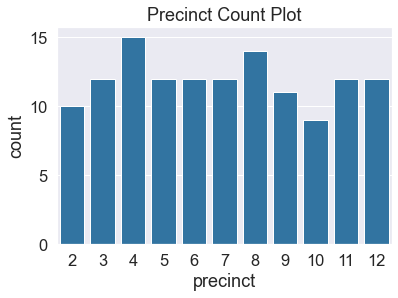

In [22]:
sns.countplot(x=scout['precinct'], color='C0')
plt.title('Precinct Count Plot')

All of the precincts seem to occur at around the same frequency, so we don't need to add any features indicating whether or not a certain precinct is controlled a lot. However, we do observe that precinct 1 doesn't seem to be patrolled, despite it occurring about 11,000 times in `crime`:

In [23]:
print('Number of observations from precinct 1 in crime dataset: ' + str(crime['precinct'].value_counts().loc[1.0]))

Number of observations from precinct 1 in crime dataset: 11092


In [24]:
set(crime['precinct'].unique()) - set(scout['precinct'].unique())

{nan, 1.0}

#### Missing Values

In [25]:
scout['precinct'].isnull().sum()

0

There are no missing values in this dataset.

`scouts` is now in a tidy format, but it is only one column. We will address this when combining with `crime`.
### Green Stormwater Infrastructure Locations

In [26]:
storm = pd.read_csv('data/Green_Stormwater_Infrastructure_Locations_OpenData.csv')
storm.head(2)

,X,Y,OBJECTID,PROJECT_NAME,ASSET_CATEGORY,PRACTICE_TYPE,CREDIT_RECEIVED,ACRES_MANAGED,DESCRIPTION,DESIGNER,...,DOC_URL1,Num_RainBarrells,Size_RainBarrel,Downspout_RainBarrel,Purpose_RainBarrels,Installation_Date,OTHER_PRACTICETYPE,Secondary_Project_Reason,Project_Engineer,DEPTH
0,-9.264704e+06,5.214982e+06,1,Artesian Street,DWSD,Permeable Pavement,Yes,5.30,Porous Asphalt along Artesian Street from 1895...,NaN,...,NaN,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN
1,-9.264513e+06,5.213854e+06,2,Stahelin,DWSD,Bioretention,Yes,1.12,This is a bioretention practice installed on a...,NaN,...,NaN,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN


In [27]:
storm.shape

(223, 47)

In [28]:
list(storm.columns)

['X',
 'Y',
 'OBJECTID',
 'PROJECT_NAME',
 'ASSET_CATEGORY',
 'PRACTICE_TYPE',
 'CREDIT_RECEIVED',
 'ACRES_MANAGED',
 'DESCRIPTION',
 'DESIGNER',
 'INSTALLER',
 'MAINTAINER',
 'MEDIA_URL',
 'ADDITIONAL_PRACTICETYPE',
 'GALLONS_MANAGED_MG',
 'PRACTICE_AREA',
 'NEIGHBORHOOD',
 'PROJECT_REASON',
 'DESIGN_DATE',
 'PROJECT_COST',
 'MAINTENANCE_COST',
 'MAX_DEPTH',
 'UNDERDRAIN',
 'PIPE_DIAMETER',
 'STORM_EVENT_SIZE',
 'CONSTRUCTION_START',
 'OWNER_TYPE',
 'INVERT_PIPE_in',
 'Latitude',
 'Longitude',
 'GlobalID',
 'DISTRICT',
 'MEDIA_URL2',
 'MEDIA_URL3',
 'VIDEO_URL',
 'Project_Page_URL',
 'DOC_URL2',
 'DOC_URL1',
 'Num_RainBarrells',
 'Size_RainBarrel',
 'Downspout_RainBarrel',
 'Purpose_RainBarrels',
 'Installation_Date',
 'OTHER_PRACTICETYPE',
 'Secondary_Project_Reason',
 'Project_Engineer',
 'DEPTH']

This dataset is relatively small as we can't expect there to be a large number of storm infrastructure in the city of Detroit. However, there is a lot of information stored in different columns about each piece of infrastructure.

In [29]:
storm.dtypes

X                           float64
Y                           float64
OBJECTID                      int64
PROJECT_NAME                 object
ASSET_CATEGORY               object
PRACTICE_TYPE                object
CREDIT_RECEIVED              object
ACRES_MANAGED               float64
DESCRIPTION                  object
DESIGNER                     object
INSTALLER                    object
MAINTAINER                   object
MEDIA_URL                    object
ADDITIONAL_PRACTICETYPE      object
GALLONS_MANAGED_MG          float64
PRACTICE_AREA               float64
NEIGHBORHOOD                 object
PROJECT_REASON               object
DESIGN_DATE                  object
PROJECT_COST                float64
MAINTENANCE_COST            float64
MAX_DEPTH                   float64
UNDERDRAIN                   object
PIPE_DIAMETER               float64
STORM_EVENT_SIZE             object
CONSTRUCTION_START           object
OWNER_TYPE                   object
INVERT_PIPE_in              

Many of these columns are mostly empty and won't be helpful for our geo-spatial analysis of crime, so we'll be dropping most of these columns when we clean this dataset.

In [30]:
storm = storm[["ASSET_CATEGORY", "Latitude", "Longitude", "NEIGHBORHOOD", "DISTRICT"]].rename(
    columns={
        "ASSET_CATEGORY": "asset_category", 
        "NEIGHBORHOOD": "neighborhood", 
        "Latitude": "latitude", 
        "Longitude": "longtitude", 
        "DISTRICT": "district"
    })
storm.head()

,asset_category,latitude,longtitude,neighborhood,district
0,DWSD,NaN,NaN,Franklin Park,District 7
1,DWSD,NaN,NaN,Warrendale,District 7
2,DWSD,NaN,NaN,Warrendale,District 7
3,DWSD,NaN,NaN,Warrendale,District 7
4,DWSD,NaN,NaN,Warrendale,District 7


We see that there will be quite a bit of rows with null values for the latitude and longitude, and we will not be able to provide analysis for those rows. Hence, we remove those rows.

In [31]:
storm.dropna(inplace=True)
storm.head(3)

,asset_category,latitude,longtitude,neighborhood,district
14,Drainage Credit,42.304727,-83.125389,Springwells,District 6
65,Private - No Credit,42.385402,-82.958615,Fox Creek,District 4
66,Private - No Credit,42.351603,-83.064737,Midtown,District 6


It seems that none of the rows include any null values, and we're only limiting our dataset to the columns that we prefer to have. Our data is now relatively tidy. 

#### Keeping Neighborhoods in `crime`
Below, we observe that the neighborhoods in `storm` and those in `crime` aren't the same, which makes sense. However, we might have some that are the same but are referred to as different names. Let's see if we can look for some similarities.

In [32]:
set(storm['neighborhood']) - set(crime['neighborhood'])

{'Bethune Community',
 'Boston Edison',
 'Campau/Banglatown',
 'East Village',
 'Eden Gardens',
 'Farwell',
 'Grand River-St Marys',
 'Gratiot Woods',
 'LaSalle Gardens',
 'McNichols Evergreen',
 'Medbury Park',
 'Midtown',
 'North End',
 'Oak Grove',
 'Oakman Blvd Community',
 'Outer Drive-Hayes',
 'Springwells',
 'Tech Town',
 'Von Steuben'}

In [33]:
storm['neighborhood'] = storm['neighborhood'].str.replace('Boston Edison', 'Boston-Edison')
storm['neighborhood'] = storm['neighborhood'].str.replace('East Village', 'East English Village')
storm['neighborhood'] = storm['neighborhood'].str.replace('Gratiot Woods', 'State Fair-Gratiot')
storm['neighborhood'] = storm['neighborhood'].str.replace('LaSalle Gardens', 'Lasalle Gardens')
storm['neighborhood'] = storm['neighborhood'].str.replace('LaSalle Gardens', 'Lasalle Gardens')
storm['neighborhood'] = storm['neighborhood'].str.replace('North Rosedale Park', 'North Rosedale Park')
storm['neighborhood'] = storm['neighborhood'].str.replace('Oakman Blvd Community', 'Oakman')
storm['neighborhood'] = storm['neighborhood'].str.replace('Rosedale Park', 'Rosedale Park')

We have 

In [34]:
set(storm['neighborhood']) - set(crime['neighborhood'])

{'Bethune Community',
 'Campau/Banglatown',
 'Eden Gardens',
 'Farwell',
 'Grand River-St Marys',
 'McNichols Evergreen',
 'Medbury Park',
 'Midtown',
 'North End',
 'Oak Grove',
 'Outer Drive-Hayes',
 'Springwells',
 'Tech Town',
 'Von Steuben'}

We have a better overlap now, so let's drop these remaining neighborhoods that have no information in `crime`.

In [35]:
exclude = list(set(storm['neighborhood']) - set(crime['neighborhood']))
storm = storm[~storm['neighborhood'].isin(exclude)]
storm.head()

,asset_category,latitude,longtitude,neighborhood,district
65,Private - No Credit,42.385402,-82.958615,Fox Creek,District 4
67,Private - No Credit,42.376868,-82.998895,State Fair-Gratiot,District 5
68,Private - No Credit,42.376098,-82.994081,State Fair-Gratiot,District 4
69,Private - No Credit,42.377787,-82.995210,State Fair-Gratiot,District 4
70,Private - No Credit,42.375334,-82.993479,State Fair-Gratiot,District 4


We will be dropping all the columns except `neighborhoood`, since they are not useful or have all the same values.

In [36]:
storm = storm['neighborhood']

### Master Plan Neighborhoods

In [37]:
plan = pd.read_csv('data/Master_Plan_Neighborhoods.csv')
plan.head()

,FID,NHOOD,Cluster,MapNo,NeighC,MapPage,MapPage_LU,F4Color_key,SHAPE_Length,SHAPE_Area
0,1,Airport,1,1,Neighborhood Cluster 1,Map 1-1B,Map 1-1A,0,49178.410893,1.292113e+08
1,2,Bagley,10,1,Neighborhood Cluster 10,Map 10-1B,Map 10-1A,3,32646.892258,5.437710e+07
2,3,Boynton,5,1,Neighborhood Cluster 5,Map 5-1B,Map 5-1A,1,39759.946468,6.496687e+07
3,4,Brightmoor,8,1,Neighborhood Cluster 8,Map 8-1B,Map 8-1A,1,54589.268292,1.089440e+08
4,5,Brooks,7,1,Neighborhood Cluster 7,Map 7-1B,Map 7-1A,1,51172.011857,1.249278e+08


In [38]:
plan.shape

(54, 10)

#### Selecting Columns

We are only concerned with whether a neighborhood with high crime is a Master Plan neighborhood, so we just extract the neighborhood (`NHOOD`) column.

In [39]:
plan = plan['NHOOD']
plan.head()

0       Airport
1        Bagley
2       Boynton
3    Brightmoor
4        Brooks
Name: NHOOD, dtype: object

#### Missing Values

In [40]:
plan.isnull().sum()

0

We can see that there are no columns containing null values, hence we don't need to drop any rows. 

#### Keeping Neighborhoods in `crime`
Below, we observe that the neighborhoods in `plan` and those in `crime` aren't the same, which makes sense. However, we might have some that are the same but are referred to as different names. Let's see if we can look for some similarities.

In [41]:
# Neighborhoods that these datasets don't share
set(plan.values) - set(crime['neighborhood'])

{'Airport',
 'Brooks',
 'Butzel',
 'Central Business District',
 'Cerveny / Grandmont',
 'Chadsey',
 'Cody',
 'Condon',
 'Davison',
 'Durfee',
 'East Riverside',
 'Evergreen',
 'Finney',
 'Foch',
 'Grant',
 'Hubbard Richard',
 'Jefferson / Mack',
 'Jeffries',
 'Kettering',
 'Lower East Central',
 'Lower Woodward',
 'McNichols',
 'Middle East Central',
 'Middle Woodward',
 'Mt. Olivet',
 'Near East Riverfront',
 'Nolan',
 'Redford',
 'Rosa Parks',
 'Rosedale',
 'Rouge',
 'Springwells',
 'State Fair',
 'Upper East Central',
 'Vernor / Junction',
 'West Riverfront',
 'Winterhalter'}

In [42]:
plan = plan.replace('Airport', 'City Airport')
plan = plan.replace('Central Business District', 'Downtown')
plan = plan.replace('Winterhalter', 'Winter Halter')
plan = plan.replace('Mt. Olivet', 'Mt. Olivet Cemetery')
plan = plan.replace('Middle East Central', 'Downtown')
plan = plan.replace('Lower East Central', 'Downtown')
plan = plan.replace('Kettering', 'Ketterring')
plan = plan.replace('Hubbard Richard', 'Hubbard-Richard')

crime['neighborhood'] = crime['neighborhood'].replace('State Fair-Nolan', 'State Fair')
crime['neighborhood'] = crime['neighborhood'].replace('State Fair-Gratiot', 'State Fair')
crime['neighborhood'] = crime['neighborhood'].replace('Gradmont-Rosedale', 'Rosedale')
crime['neighborhood'] = crime['neighborhood'].replace('North Rosedale Park', 'Rosedale')
crime['neighborhood'] = crime['neighborhood'].replace('Rosedale Park', 'Rosedale')
crime['neighborhood'] = crime['neighborhood'].replace('Old Redford', 'Redford')
crime['neighborhood'] = crime['neighborhood'].replace('Evergreen 6/7 Mile', 'Evergreen')
crime['neighborhood'] = crime['neighborhood'].replace(' Evergreen 7/8Mile', 'Evergreen')
crime['neighborhood'] = crime['neighborhood'].replace('Cerveny', 'Cerveny / Grandmont')
crime['neighborhood'] = crime['neighborhood'].replace('Grandmont', 'Cerveny / Grandmont')

We've changed the neighborhoods in each dataset to ensure we're referring to the same thing. This should reduce bias in our analysis.

In [43]:
exclude = list(set(plan.values) - set(crime['neighborhood']))
plan = plan[~plan.isin(exclude)]

## Combining Datasets and Adding Features
### `crime` and `scout`
We will not be using conventional DataFrame merging operations on these two datasets, since `scout` is just a column of precincts. Instead, we will append a new column to `crime`, `is_patrolled`, indicating whether a precinct in that dataset is in `scout`. This will be a new categorical feature.

Text(0, 0.5, 'Frequency')

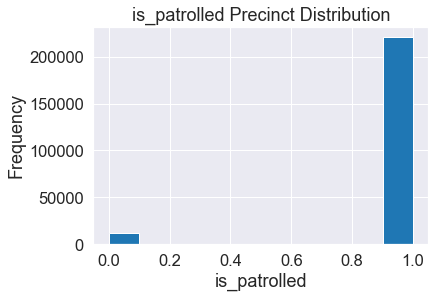

In [44]:
crime['is_patrolled'] = np.where(crime['precinct'].isin(scout['precinct']), 1, 0)
crime['is_patrolled'].hist()
plt.title('is_patrolled Precinct Distribution')
plt.xlabel('is_patrolled')
plt.ylabel('Frequency')

This column isn't very interesting because only one neighborhood isn't patrolled, and this distribution yields a huge class imbalance. However, as seem in the `scout` precinct distributions, some neighborhoods have more scouting areas than others. We can split these accounts into quartiles, and add a binary column, `patrolled_top_quartile`, to `crime`, to indicate, whether that neighborhood has a number of scouted areas that are in the upper quartile for the whole city.

Text(0, 0.5, 'Frequency')

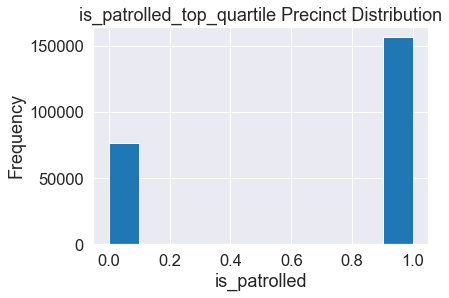

In [45]:
scout_srs = pd.Series(scout['precinct'])

top_quartile_count = scout_srs.value_counts().describe().loc['75%']
top_quartile_precincts = scout_srs.value_counts()[
    scout_srs.value_counts() >= top_quartile_count
].index.get_level_values(0)

crime['partolled_top_quartile'] = np.where(crime['precinct'].isin(top_quartile_precincts), 1, 0)
crime['partolled_top_quartile'].hist()
plt.title('is_patrolled_top_quartile Precinct Distribution')
plt.xlabel('is_patrolled')
plt.ylabel('Frequency')

The balance isn't as prominent as before, but it's still there, which, taken into real-world context, is good. Note that this column is not an purely an indicator of the DPD's decisions on where to patrol. Since we are measuring number of areas in each precinct, this column can also take into account factors like size.

We have added two new columns based on information from `scouts` into our master dataset.

### `crime` and `storm`
We add some new features to indicate how much green storm infrastructure a neighborhood has (after 1970, before 2015). We believe this is important because this can be the sign of an affluent neighborhood.

In [46]:
storm_counts = storm.value_counts()

def get_storm_count(nborhood):
    try:
        return storm_counts.loc[nborhood]
    except KeyError:
        return 0

crime['num_storm_drains'] = crime['neighborhood'].apply(get_storm_count)
crime['has_storm_drains'] = (crime['num_storm_drains'] > 0).astype(int)

Text(0, 0.5, 'Frequency')

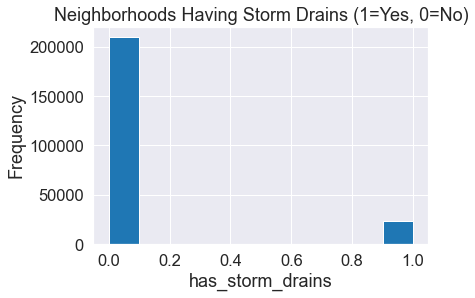

In [47]:
crime['has_storm_drains'].hist()
plt.title('Neighborhoods Having Storm Drains (1=Yes, 0=No)')
plt.xlabel('has_storm_drains')
plt.ylabel('Frequency')

There is a significant imbalance in classes in this feature. Unfortunatel, there isn't as much we can do in the cleaning phase to work around this.

### `crime` and `plan`
These two will be pretty easy combine. We will just add another column indicating whether that neighboorhood is a Master Plan neighborhood.

<AxesSubplot:>

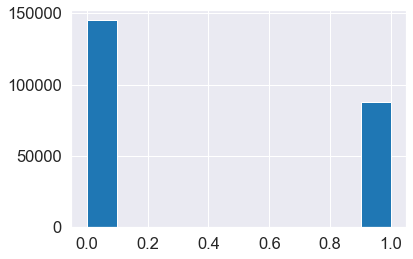

In [48]:
crime['is_master_plan'] = crime['neighborhood'].isin(plan).astype(int)
crime['is_master_plan'].hist()

We seem to have a fair amount of Master Plan Neighborhoods, and the classes are a little less imbalanced.

## Master Dataset
We have combined our datasets, and our master dataset looks as follows:

In [49]:
crime.head()

,crime_category,date,neighborhood,precinct,latitude,longitude,is_patrolled,partolled_top_quartile,num_storm_drains,has_storm_drains,is_master_plan
0,STOLEN VEHICLE,2011/01,Pershing,11.0,42.4382,83.0579,1,1,0,0,1
1,AGGRAVATED ASSAULT,2011/01,Lafayette Park,7.0,42.3394,83.0295,1,1,0,0,0
2,LARCENY,2011/01,Outer Drive Van Dyke,11.0,42.4415,83.0238,1,1,0,0,0
3,LARCENY,2011/01,Chene,7.0,42.3606,83.0339,1,1,0,0,0
4,STOLEN VEHICLE,2011/01,Warrendale,6.0,42.3328,83.2280,1,1,0,0,0


# Data Analysis & Results (EDA)

For the reason that we have 158 different neighborhoods, we only select the most representative five neighborhoods to analyze: BURBANK, GREENFIELD, DENBY, WARRENDALE and STATE FAIR-NOLAN.

In [50]:
crime.neighborhood.value_counts()

Burbank                8517
Greenfield             7638
State Fair             7188
Denby                  6930
Warrendale             6707
                       ... 
Highland Park            46
Hamtramck                40
Fisher                   38
Woodlawn Cemetery        19
Mt. Olivet Cemetery      12
Name: neighborhood, Length: 155, dtype: int64

In [60]:
crime_represent = crime[(crime.neighborhood == 'Burbank') | (crime.neighborhood == 'Greenfield') |
                          (crime.neighborhood == 'Denby') | (crime.neighborhood == 'Warrendale') | 
                          (crime.neighborhood == 'State Fair-Nolan')]

In [61]:
crime_represent.shape

(29792, 11)

In [62]:
crime_represent

,crime_category,date,neighborhood,precinct,latitude,longitude,is_patrolled,partolled_top_quartile,num_storm_drains,has_storm_drains,is_master_plan
4,STOLEN VEHICLE,2011/01,Warrendale,6.0,42.3328,83.2280,1,1,0,0,0
36,STOLEN VEHICLE,2011/01,Warrendale,6.0,42.3471,83.2236,1,1,0,0,0
50,AGGRAVATED ASSAULT,2011/01,Burbank,9.0,42.4253,82.9641,1,0,0,0,1
54,AGGRAVATED ASSAULT,2011/01,Denby,9.0,42.4271,82.9521,1,0,0,0,1
74,BURGLARY,2011/01,Denby,9.0,42.4146,82.9504,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
234881,LARCENY,2014/12,Warrendale,6.0,42.3539,83.2403,1,1,0,0,0
234932,STOLEN VEHICLE,2014/02,Denby,9.0,42.4104,82.9470,1,0,0,0,1
234941,LARCENY,2014/10,Greenfield,8.0,42.4325,83.2007,1,1,0,0,1
234942,STOLEN VEHICLE,2014/07,Denby,9.0,42.4113,82.9599,1,0,0,0,1


There are 6 different types of crime and we need to find out which categoty is the most common crime.

In [53]:
crime.crime_category.value_counts()

LARCENY               69577
BURGLARY              56149
STOLEN VEHICLE        48007
AGGRAVATED ASSAULT    37010
ROBBERY               20883
HOMICIDE               1381
Name: crime_category, dtype: int64

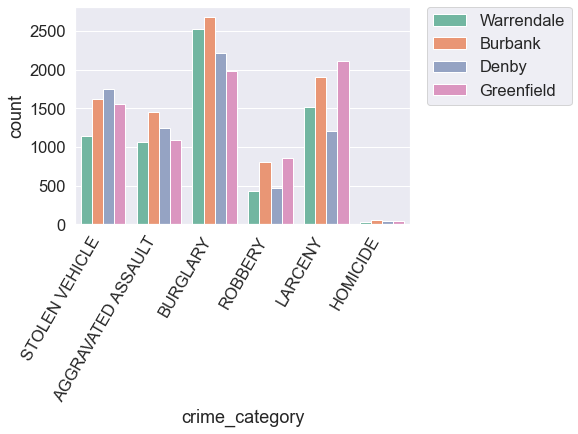

In [63]:
chart_byCategory = sns.countplot(x = 'crime_category', hue='neighborhood', palette="Set2", data = crime_represent)
chart_byCategory.set_xticklabels(chart_byCategory.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From the graph above, we can see that DENBY has the most number of stolen vehicle, BURBANK has the most number of burglary and aggravated assult, GREENFIELD has the most number of larceny and robbbery, and STATE FAIR-NOLAN has the most number of homicide.

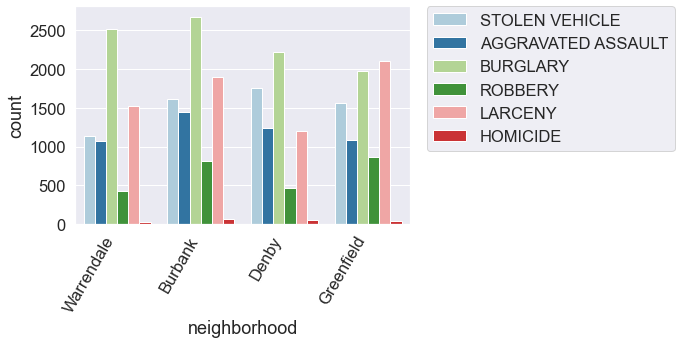

In [64]:
chart_ByNeighborhood = sns.countplot(x = 'neighborhood', hue='crime_category', palette="Paired", data = crime_represent)
chart_ByNeighborhood.set_xticklabels(chart_ByNeighborhood.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From the graph above, we can see that DENBY, BURBANK and WARRENDALE have burglary higher than the other categories of crime, STATE FAIR-NOLAN and GREENFILED have larceny and burglary the same severity.

<ipython-input-65-fb3056bd6774>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  date_crime.set_xticklabels(date_crime.get_xticklabels(), rotation=60, horizontalalignment='right')


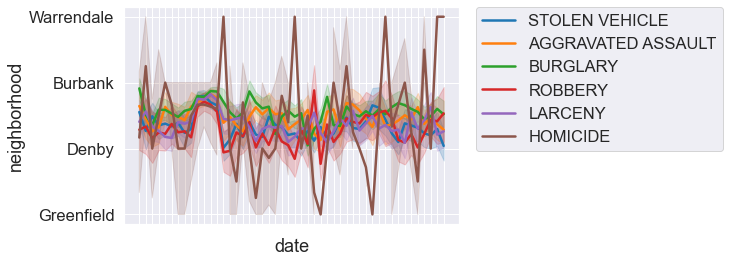

In [65]:
date_crime = sns.lineplot(x='date', y = 'neighborhood',hue='crime_category', data = crime_represent)
date_crime.set_xticklabels(date_crime.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Possible Factors from Our Supplemental Datasets
Next, we seek to determine whether the features we add from our supplemental data will affect the amount of crime, as well as the most prevalent types of crime in the neighborhoods.

Text(0.5, 0.98, 'Crime Category Comparison of Non-Patrolled and Patrolled Neighborhoods')

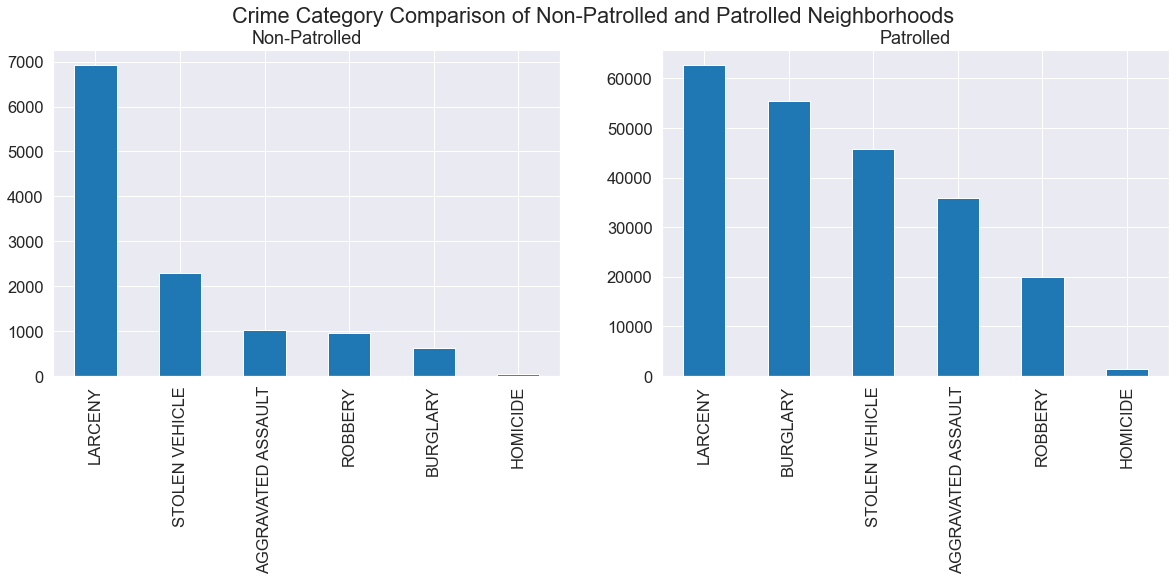

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
crime[crime['is_patrolled'] == 0]['crime_category'].value_counts().plot(kind='bar', ax=ax[0], title='Non-Patrolled')
crime[crime['is_patrolled'] == 1]['crime_category'].value_counts().plot(kind='bar', ax=ax[1], title='Patrolled')
plt.suptitle('Crime Category Comparison of Non-Patrolled and Patrolled Neighborhoods')

Text(0.5, 0.98, 'Crime Category Comparison of Neighborhoods with Storm Infrastructure')

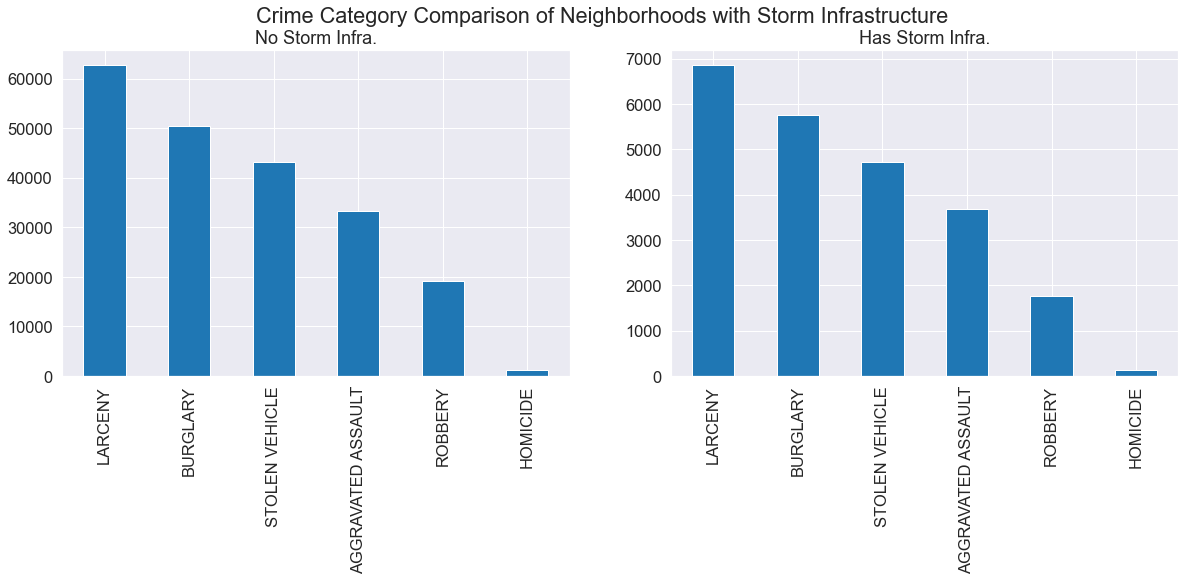

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
crime[crime['has_storm_drains'] == 0]['crime_category'].value_counts().plot(kind='bar', ax=ax[0], title='No Storm Infra.')
crime[crime['has_storm_drains'] == 1]['crime_category'].value_counts().plot(kind='bar', ax=ax[1], title='Has Storm Infra.')
plt.suptitle('Crime Category Comparison of Neighborhoods with Storm Infrastructure')

Text(0.5, 0.98, 'Crime Category Comparison of Master Plan Neighborhoods')

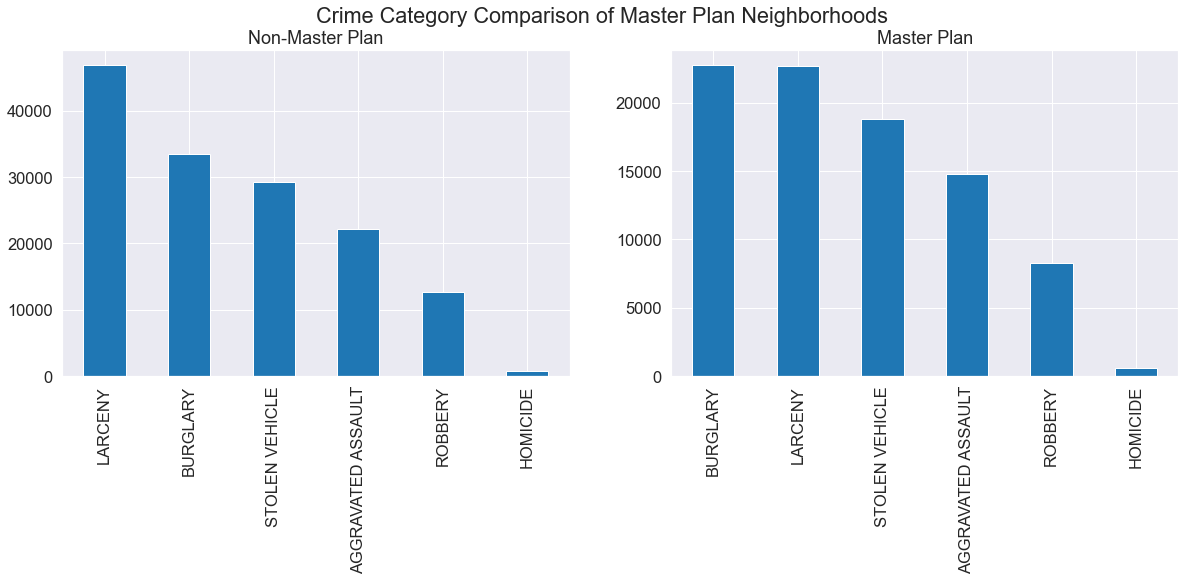

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
crime[crime['is_master_plan'] == 0]['crime_category'].value_counts().plot(kind='bar', ax=ax[0], title='Non-Master Plan')
crime[crime['is_master_plan'] == 1]['crime_category'].value_counts().plot(kind='bar', ax=ax[1], title='Master Plan')
plt.suptitle('Crime Category Comparison of Master Plan Neighborhoods')

- Looking at all three of these factors, the distributions don't seem to vary a lot. 
- Burglary seems to be as frequent as larceny in Master Plan neighborhoods, while larceny is more frequent in non-Master Plan neighborhoods.